## Bootstrapping

Parametric inference can be **non-robust**:

* inaccurate if parametric assumptions are violated
* if we rely on asymptotic results, we may not achieve an acceptable level of accuracy

Parmetric inference can be **difficult**:

* derivation of sampling distribution may not be possible

An alternative is to estimate the sampling distribution of a statistic *empirically* without making assumptions about the form of the population.

We have seen this already with the kernel density estimate.

### Non-parametric Bootstrap

The bootstrap is a resampling method discovered by [Brad Efron](http://www.jstor.org/discover/10.2307/2958830?uid=3739568&uid=2&uid=4&uid=3739256&sid=21102342537691) that allows one to approximate the true sampling distribution of a dataset, and thereby obtain estimates of the mean and variance of the distribution.

Bootstrap sample:

<div style="font-size: 120%;">  
$$S_1^* = \{x_{11}^*, x_{12}^*, \ldots, x_{1n}^*\}$$
</div>

$S_i^*$ is a sample of size $n$, **with** replacement.

In Python, we have already seen the NumPy function `permutation` that can be used in conjunction with Pandas' `take` method to generate a random sample of some data without replacement:

In [62]:
np.random.permutation(titanic.name)[:5]

array([u'Meek, Mrs. Thomas (Annie Louise Rowley)',
       u'Thorneycroft, Mr. Percival', u'Williams, Mr. Leslie',
       u'Graham, Mr. George Edward', u'Petroff, Mr. Nedelio'], dtype=object)

Sampling is even easier in pandas; `DataFrame` and `Series` objects have `sample` methods that allow for sampling without the need for outside functions.

In [101]:
titanic.name.sample(n=5)

0                     Allen, Miss. Elisabeth Walton
774                          Dintcheff, Mr. Valtcho
520    Nourney, Mr. Alfred ("Baron von Drachstedt")
604                     Abelseth, Miss. Karen Marie
214                          Newell, Miss. Marjorie
Name: name, dtype: object

We can use either method to generate a sample *with* replacement, which we can use when bootstrapping.

In [102]:
titanic.name.sample(n=5, replace=True)

491                                Malachard, Mr. Noel
277     Spencer, Mrs. William Augustus (Marie Eugenie)
1134                                 Pokrnic, Mr. Tome
418                               Gilbert, Mr. William
1101                      Panula, Master. Eino Viljami
Name: name, dtype: object

We regard S as an "estimate" of population P

> population : sample :: sample : bootstrap sample

The idea is to generate replicate bootstrap samples:

<div style="font-size: 120%;">  
$$S^* = \{S_1^*, S_2^*, \ldots, S_R^*\}$$
</div>

Compute statistic $t$ (estimate) for each bootstrap sample:

<div style="font-size: 120%;">  
$$T_i^* = t(S^*)$$
</div>

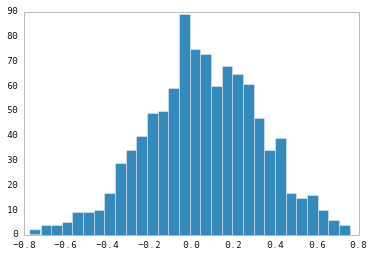

In [104]:
n = 10
R = 1000

# Original sample (n=10)
x = np.random.normal(size=n)

# 1000 bootstrap samples of size 10
s = [x[np.random.randint(0,n,n)].mean() for i in range(R)]
_ = plt.hist(s, bins=30)

### Bootstrap Estimates

From our bootstrapped samples, we can extract *estimates* of the expectation and its variance:

$$\bar{T}^* = \hat{E}(T^*) = \frac{\sum_i T_i^*}{R}$$

$$\hat{\text{Var}}(T^*) = \frac{\sum_i (T_i^* - \bar{T}^*)^2}{R-1}$$


In [105]:
boot_mean = np.sum(s)/R
boot_mean

0.057155616873811897

In [106]:
boot_var = ((np.array(s) - boot_mean) ** 2).sum() / (R-1)
boot_var

0.073976665901198196

Since we have estimated the expectation of the bootstrapped statistics, we can estimate the **bias** of T:

$$\hat{B}^* = \bar{T}^* - T$$


In [107]:
boot_mean - np.mean(x)

-0.0049824765740344584

### Bootstrap error

There are two sources of error in bootstrap estimates:

1. **Sampling error** from the selection of $S$.
2. **Bootstrap error** from failing to enumerate all possible bootstrap samples.

For the sake of accuracy, it is prudent to choose at least R=1000

### Bootstrap Percentile Intervals

An attractive feature of bootstrap statistics is the ease with which you can obtain an estimate of *uncertainty* for a given statistic. We simply use the empirical quantiles of the bootstrapped statistics to obtain percentiles corresponding to a confidence interval of interest.

This employs the *ordered* bootstrap replicates:

$$T_{(1)}^*, T_{(2)}^*, \ldots, T_{(R)}^*$$

Simply extract the $100(\alpha/2)$ and $100(1-\alpha/2)$ percentiles:

$$T_{[(R+1)\alpha/2]}^* \lt \theta \lt T_{[(R+1)(1-\alpha/2)]}^*$$

In [108]:
s_sorted = np.sort(s)
s_sorted[:10]

array([-0.77121257, -0.76221168, -0.71968499, -0.71368562, -0.70362959,
       -0.67829526, -0.66921796, -0.66073409, -0.65814924, -0.64539504])

In [109]:
s_sorted[-10:]

array([ 0.65547332,  0.659164  ,  0.66423513,  0.66439785,  0.67158405,
        0.69481225,  0.70746916,  0.71588898,  0.72275641,  0.75692853])

In [110]:
alpha = 0.05
s_sorted[[(R+1)*alpha/2, (R+1)*(1-alpha/2)]]

array([-0.5041506 ,  0.57263483])

### Exercise: Cervical dystonia bootstrap estimates

Use bootstrapping to estimate the mean of one of the treatment groups, and calculate percentile intervals for the mean.

In [111]:
# Write your answer here

---

In [112]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()